ensemble of cnn , resnet, vgg

In [288]:
import tensorflow as tf # Imports tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import numpy as np
import pandas as pd 
import matplotlib
import seaborn as sns
import sklearn

from imblearn.over_sampling import RandomOverSampler 
import imblearn
#from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters

In [289]:
import pandas as pd
data = pd.read_csv('/home/robot/deep/skin/dataset/hmnist_28_28_RGB.csv')
data


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [290]:
y = data['label']
x = data.drop(columns = ['label'])


In [291]:
tabular_data = pd.read_csv('/home/robot/deep/skin/dataset/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [292]:


classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}
#classes = {'mel':0 ,'vasc':1,'df':2,'nv':3,'bkl':4,'bcc':5,'ak':6}



Text(0.5, 1.0, 'Frequency Distribution of Classes')

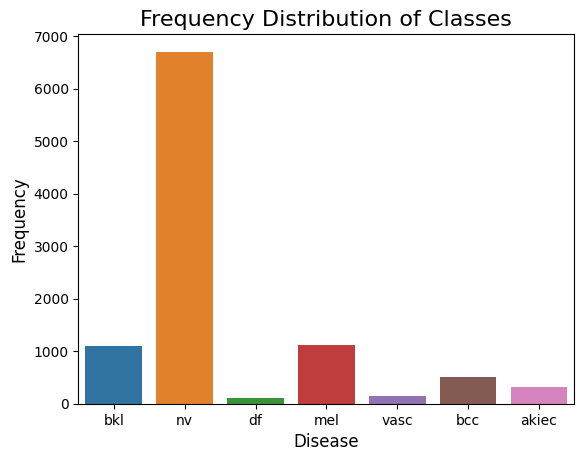

In [293]:


sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

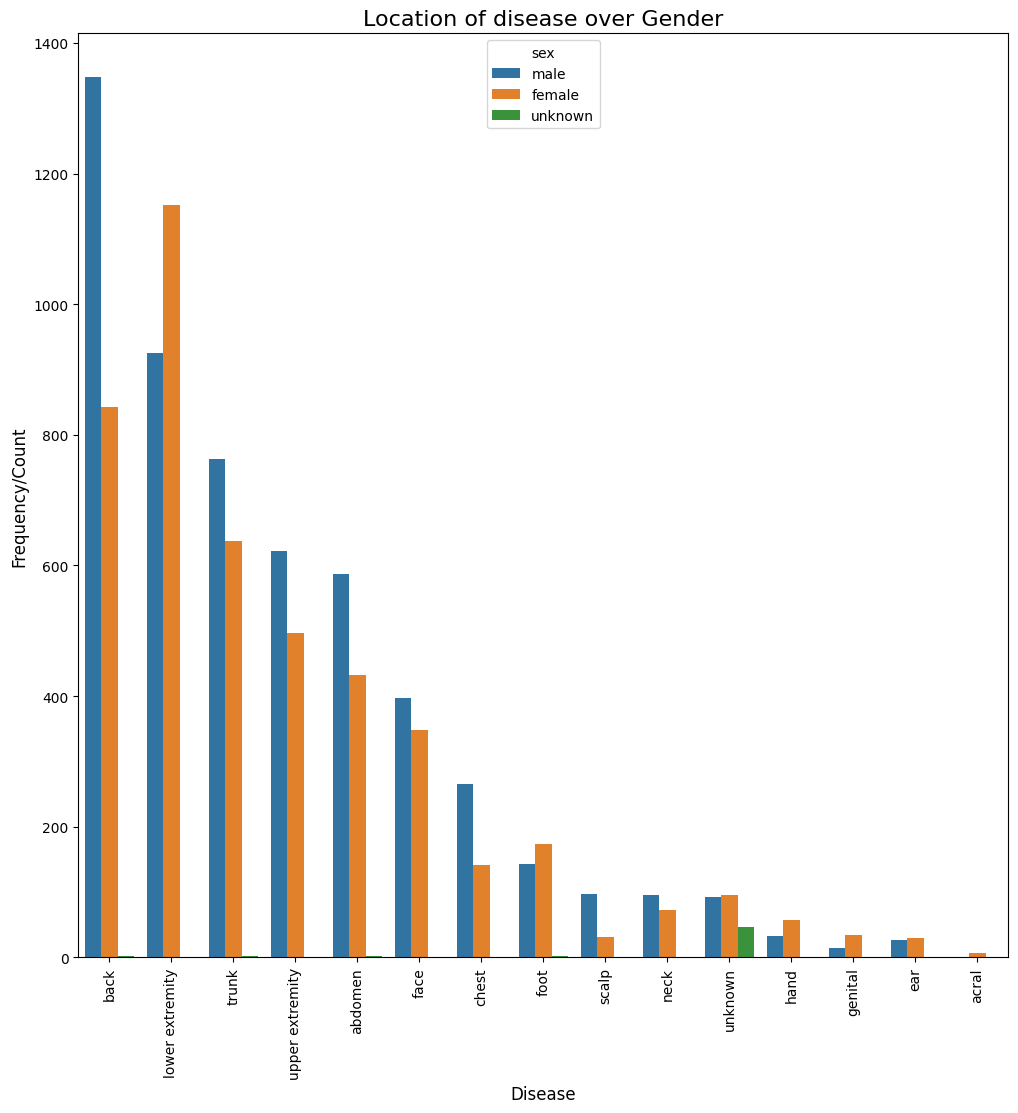

In [294]:


value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)



In [295]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [298]:
x= np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [299]:
y = to_categorical(y)

In [300]:


x = (x-np.mean(x))/np.std(x)

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)



In [301]:
def blockred(inp,filters):
    #Inception
    x = Conv2D(filters, 1, activation="relu",padding='same',use_bias=False)(inp)
    x = layers.MaxPooling2D(2)(x)
    x = BatchNormalization(axis=1)(x)
    
    #VGG + SQuizenet
    y = Conv2D(filters*2,3,activation="relu", padding='same',use_bias=False,)(inp)
    y = Conv2D(filters,3,activation="relu", padding='same',use_bias=False,)(y)
    y = layers.MaxPooling2D(2)(y)
    y = BatchNormalization(axis=1)(y)
    y = Dropout(0.25)(y)
    
    #InceptionResnet+Squize
    z = Conv2D(filters*2, 3, activation="relu", padding='same',use_bias=False)(inp)
    z = Conv2D(filters, 1, activation="relu", padding='same',use_bias=False)(inp)  
    z = layers.MaxPooling2D(2)(z)
    z = BatchNormalization(axis=1)(z)
    output1 = layers.add([x,y,z])
    return output1

In [303]:
Name= "CNN0"
inputs = keras.Input(shape=(28,28,3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)

bl1=blockred(x,32)

bl2=blockred(bl1,64)

bl3=blockred(bl2,64)

# y = Conv2D(filters=128, kernel_size=(5, 5), activation='relu')(bl3)
# y = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(y)
# y = MaxPooling2D(pool_size=(2, 2))(y)
# y = BatchNormalization(axis=-1)(y)
# y = Dropout(0.25)(y)
y = Flatten()(bl3)
y = Dense(256, activation='relu')(y)
y = Dropout(0.5)(y)
y = Dense(64, activation='relu')(y)
y = Dropout(0.5)(y)
outputs=Dense(7, activation='softmax')(y)
model = keras.Model(inputs, outputs, name=Name)
print(model.summary())


Model: "CNN0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 conv2d_83 (Conv2D)             (None, 26, 26, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_85 (Conv2D)             (None, 26, 26, 64)   18432       ['conv2d_83[0][0]']              
                                                                                                  
 conv2d_86 (Conv2D)             (None, 26, 26, 32)   18432       ['conv2d_85[0][0]']              
                                                                                               

In [304]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [305]:
model.compile(optimizer= keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy() ,
              metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_test, Y_test), batch_size=512, callbacks=[callback])

Epoch 1/30
74/74 [==============================] - ETA: 0s - loss: 1.9258 - acc: 0.2606 - recall_3: 0.0418 - precision_3: 0.3785 - auc_3: 0.6556 - true_positives_3: 1570.0000 - true_negatives_3: 222710.0000 - false_negatives_3: 35978.0000 - false_positives_3: 2578.0000
Epoch 1: saving model to best_model.h5
74/74 [==============================] - 29s 368ms/step - loss: 1.9258 - acc: 0.2606 - recall_3: 0.0418 - precision_3: 0.3785 - auc_3: 0.6556 - true_positives_3: 1570.0000 - true_negatives_3: 222710.0000 - false_negatives_3: 35978.0000 - false_positives_3: 2578.0000 - val_loss: 1.7504 - val_acc: 0.3436 - val_recall_3: 0.0000e+00 - val_precision_3: 0.0000e+00 - val_auc_3: 0.7514 - val_true_positives_3: 0.0000e+00 - val_true_negatives_3: 56322.0000 - val_false_negatives_3: 9387.0000 - val_false_positives_3: 0.0000e+00
Epoch 2/30
74/74 [==============================] - ETA: 0s - loss: 1.5013 - acc: 0.4051 - recall_3: 0.1736 - precision_3: 0.6533 - auc_3: 0.8004 - true_positives_3: 65

In [306]:


model.save(Name+'.h5')

pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)



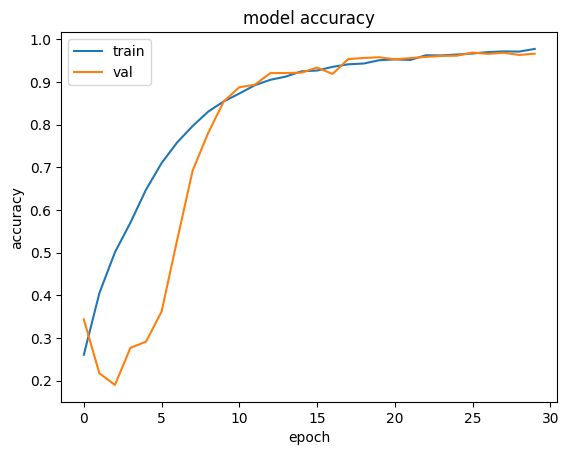

In [307]:


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



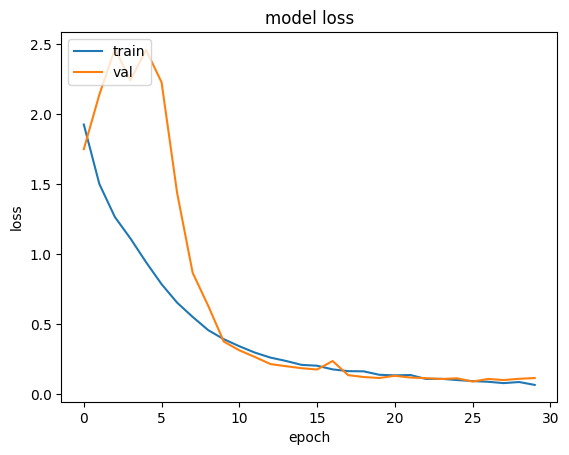

In [308]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [309]:
model.save_weights('best_model_weights.h5')

294/294 [==============================] - 4s 15ms/step


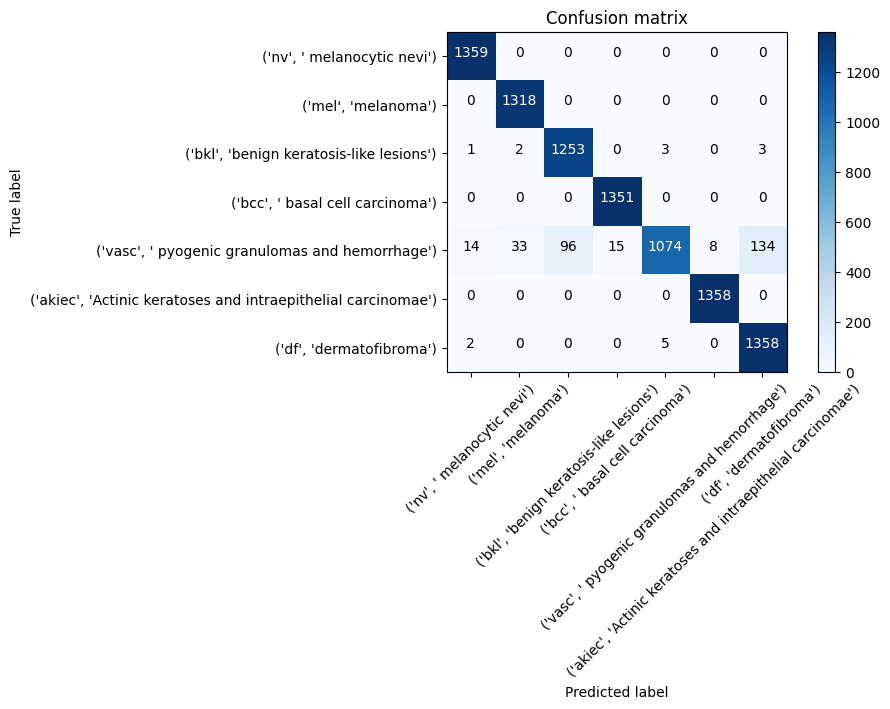

In [310]:
import itertools
from sklearn.metrics import confusion_matrix
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, ax = plt.subplots(figsize = (10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(np.argmax(Y_test,axis=1), Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes.values()) 

In [311]:


from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix
Y_pred = np.argmax(model.predict(X_test),axis=1)
print(classification_report(np.float32(np.argmax(Y_test,axis=1)), Y_pred.round()))
print('Classification Report')



294/294 [==============================] - 4s 14ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1359
         1.0       0.97      1.00      0.99      1318
         2.0       0.93      0.99      0.96      1262
         3.0       0.99      1.00      0.99      1351
         4.0       0.99      0.78      0.87      1374
         5.0       0.99      1.00      1.00      1358
         6.0       0.91      0.99      0.95      1365

    accuracy                           0.97      9387
   macro avg       0.97      0.97      0.97      9387
weighted avg       0.97      0.97      0.96      9387

Classification Report


In [312]:
import pandas as pd
#math operations
import numpy as np
#machine learning
import cv2                     
import os                  
from tqdm import tqdm  
import random
#for opening and loading image
from PIL import Image
#for preprocessing
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#Doing One hot encoding as classifier has multiple classes
from random import shuffle
#MobileNetV2 model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Model, layers
from numpy import loadtxt
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model



import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf

In [313]:
model = load_model('/home/robot/deep/skin/CNN0.h5')

In [314]:
img1 = "/home/robot/deep/skin/dataset/ham10000_images_part_1/ISIC_0029272.jpg"


In [315]:
img_path='/home/robot/deep/skin/dataset/ham10000_images_part_1/ISIC_0029272.jpg'
img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!

# Preprocessing the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype('float32')/255

In [316]:
class_dict = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

In [317]:
def pred_image(img_path,model):
  img = Image.open(img_path).resize((28, 28))  # Resize the image to match the model's input shape
 #target_size must agree with what the trained model expects!!
  # Preprocessing the image
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img.astype('float32')/255
  
  preds = model.predict(img)[0]
  prediction = sorted(
      [(class_dict[i], round(j*100, 2)) for i, j in enumerate(preds)],
      reverse=True,
      key=lambda x: x[1]
  )
  
  return prediction

In [318]:
pred_image(img1,model)

1/1 [==============================] - 0s 100ms/step


[(('bcc', ' basal cell carcinoma'), 99.4),
 (('nv', ' melanocytic nevi'), 0.59),
 (('akiec', 'Actinic keratoses and intraepithelial carcinomae'), 0.01),
 (('bkl', 'benign keratosis-like lesions'), 0.0),
 (('df', 'dermatofibroma'), 0.0),
 (('vasc', ' pyogenic granulomas and hemorrhage'), 0.0),
 (('mel', 'melanoma'), 0.0)]

1/1 [==============================] - 0s 11ms/step


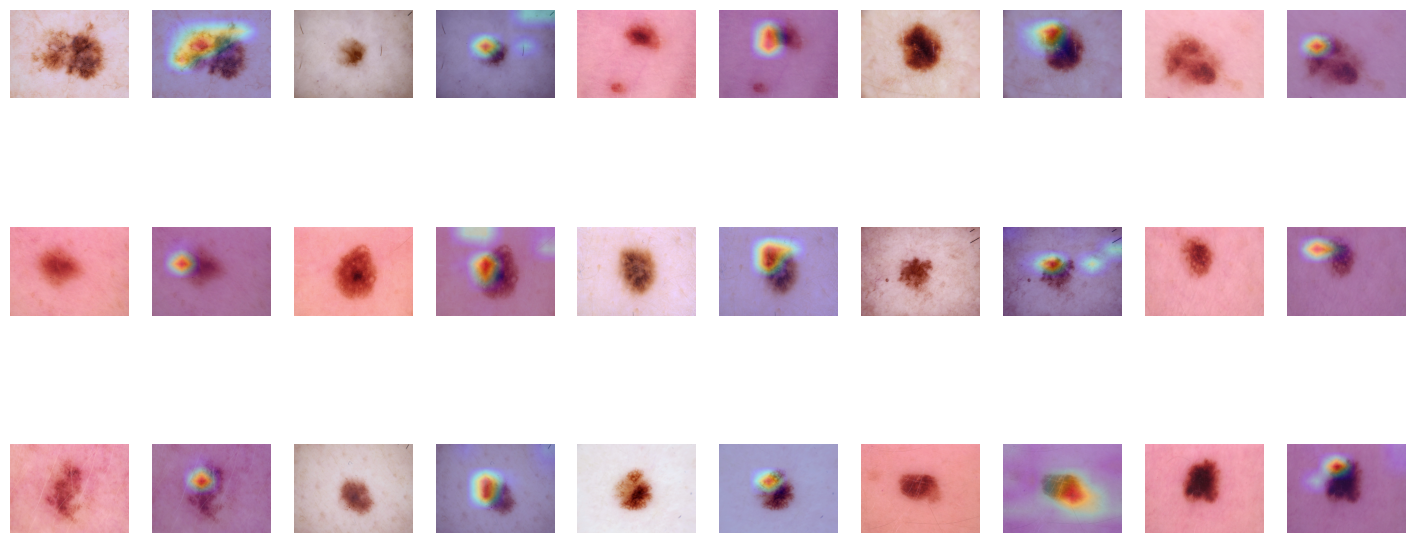

In [319]:
import os
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import cv2

# Function to load and preprocess an image
def load_and_preprocess_image(img_path, target_size=(28, 28)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0
    return img_array

# Function to save Grad CAM image
def save_gradcam(img_path, heatmap, cam_path, alpha=0.6):
    # Load the original image
    img = cv2.imread(img_path)

    # Resize the heatmap to have the same dimensions as the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convert the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)

    # Apply heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Combine the heatmap with the original image
    superimposed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Save the Grad CAM image
    cv2.imwrite(cam_path, superimposed_img)

# Function to generate and display Grad CAM for an image
def generate_and_display_gradcam(img_path, model, last_conv_layer_name, alpha=0.3, output_folder='gradcam_output'):
    img_array = load_and_preprocess_image(img_path)
    preds = model.predict(img_array)

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Save Grad CAM
    cam_path = os.path.join(output_folder, os.path.basename(img_path).replace('.jpg', '_gradcam.jpg'))
    save_gradcam(img_path, heatmap, cam_path, alpha)

    return Image.open(cam_path)

# Create output folder if it doesn't exist
output_folder = '/home/robot/deep/skin/dataset/gradcam_results'
os.makedirs(output_folder, exist_ok=True)

# Folder path containing images
folder_path = "/home/robot/deep/skin/dataset/new/"

# File extension of images in the folder
file_extension = '.jpg'
model = load_model('/home/robot/deep/skin/CNN0.h5')

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]

# Display input images and Grad CAM images
fig, axs = plt.subplots((len(image_files) + 4) // 5, 10, figsize=(18, 8))  # Rows calculated dynamically

for i, img_file in enumerate(image_files):
    img_path = os.path.join(folder_path, img_file)

    # Generate and display Grad CAM for each image
    gradcam_img = generate_and_display_gradcam(img_path, model, "conv2d_17", output_folder=output_folder)

    # Calculate subplot index based on the number of images
    row_index = i // 5
    col_index = (i % 5) * 2

    # Display input image
    input_img = Image.open(img_path)
    axs[row_index, col_index].imshow(input_img)
    axs[row_index, col_index].axis('off')

    # Display Grad CAM image
    axs[row_index, col_index + 1].imshow(gradcam_img)
    axs[row_index, col_index + 1].axis('off')

plt.show()